In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
pip install opencv-python

In [6]:
def evaluate_detection(detections, ground_truths, iou_threshold=0.5):
    tp, fp, fn = 0, 0, 0

    for gt in ground_truths:
        matched = False
        for det in detections:
            iou = compute_iou(gt, det)
            if iou >= iou_threshold:
                tp += 1
                matched = True
                break
        if not matched:
            fn += 1

    fp = len(detections) - tp
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1_score

In [7]:
def compute_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area if union_area > 0 else 0
    return iou

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
image = cv2.imread('/content/drive/MyDrive/dapros/potrait.jpg')
# Ganti dengan path gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
ground_truths = [[50, 50, 100, 100], [200, 200, 100, 100]]

In [12]:
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [13]:
num_faces = len(faces)
print(f"Jumlah wajah yang terdeteksi: {num_faces}")

Jumlah wajah yang terdeteksi: 1


In [14]:
precision, recall, f1_score = evaluate_detection(faces, ground_truths)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [15]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

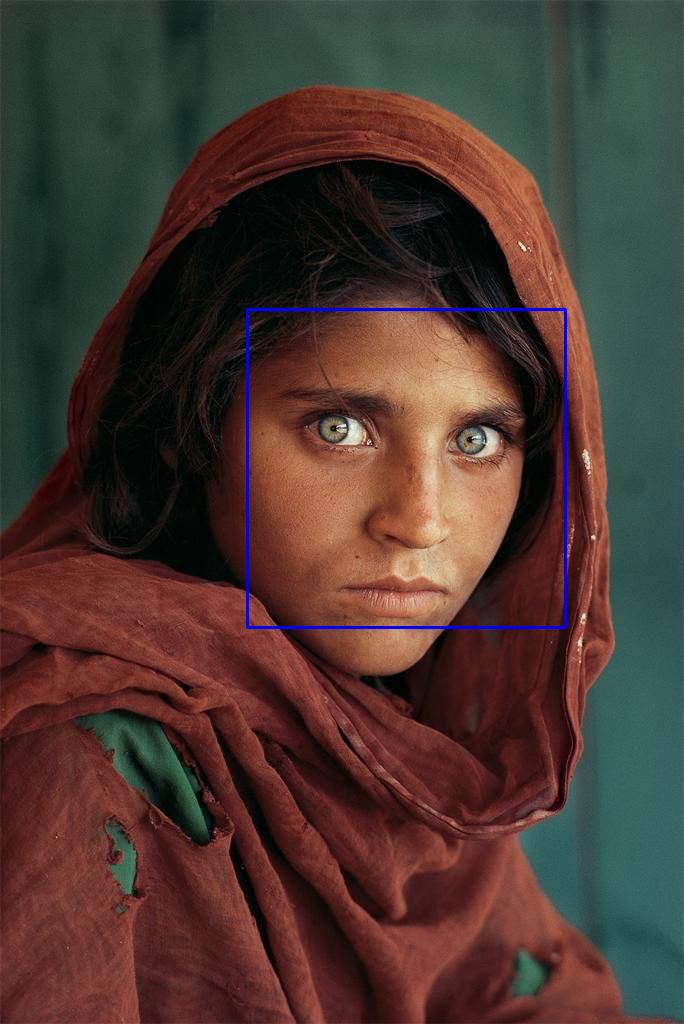

In [16]:
cv2_imshow(image)

In [17]:
import cv2
import os
from google.colab.patches import cv2_imshow

faces_path = '/content/drive/MyDrive/dapros/face'
non_faces_path = '/content/drive/MyDrive/dapros/non_face'

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return len(faces) > 0

tp, fp, tn, fn = 0, 0, 0, 0

for file in os.listdir(faces_path):
    image = cv2.imread(os.path.join(faces_path, file))
    if image is None:
        continue
    detected = detect_faces(image)
    if detected:
        tp += 1
    else:
        fn += 1

for file in os.listdir(non_faces_path):
    image = cv2.imread(os.path.join(non_faces_path, file))
    if image is None:
        continue
    detected = detect_faces(image)
    if detected:
        fp += 1
    else:
        tn += 1

accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

True Positives (TP): 62
False Positives (FP): 2
True Negatives (TN): 9
False Negatives (FN): 0
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
